# Projet:Preparation et Analyse des données WeRateDog

 ## **Table des matières**
<ul>
<ul>
<li><a id="Introduction">Introduction</a></li>
<li><a id="Collecte des données"> Collecte des données</a></li> 
<li><a id="Evaluation des données">Evaluation des données</a></li>
<li><a id="Nettoyage des données">Nettoyage des données</a></li>
<li><a id ="Stockage des données">Stockage des données</a></li>
<li><a id="Analyse et Visualisation des données">Analyse et Visualisation des données</a></li>
<li><a id="Conclusions">Conclusions</a></li>
<li><a id="Limitations">Limitations</a></li>
<li><a id="Références">Références</a></li>                 

## Introduction


### Description du projet

L'ensemble des données que nous allons analyser et visualiser dans le cadre de ce projet est l’archive de tweets de l’utilisateur de Twitter @dog_rates, également connu sous le nom de **WeRateDogs**. **WeRateDogs** est un compte Twitter qui évalue les chiens des gens avec un commentaire humoristique sur le chien. Ces notes ont presque toujours un dénominateur de 10. Mais les numérateurs ? Presque toujours supérieur à 10. 11/10, 12/10, 13/10, etc. Pourquoi ? Parce que « ce sont des chiens Brent ». WeRateDogs compte plus de 4 millions d’abonnés et a reçu une couverture médiatique internationale.

## Collecte des données

In [4]:
#Chargement du package utilse a la collecte des données
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import matplotlib.pyplot as plt
import json
import seaborn as sns
from timeit import default_timer as timer
%matplotlib inline
#Pour afficher le maximum de ligne et de colonnes
pd.set_option('display.max_columns', None)

In [5]:
#Lecture du fichier twitter_archive_enhanced.csv
df_1=pd.read_csv('twitter-archive-enhanced.csv')

In [6]:
df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
#Chargement du fichier image_predictions.tsv
url=' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
reponse=requests.get(url)
with open('image_predictions.tsv','wb') as file:
   file.write(reponse.content)
df_2=pd.read_csv('image_predictions.tsv',sep="\t")

In [5]:
df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [7]:
#Importer le fichier contenant les accces a l'API de twitter
with open("twitter_credentials.json", "r") as file:
    creds = json.load(file)
#Lecture des codes d'acces à l'API de tweeter
consumer_key = creds['CONSUMER_KEY'] 
consumer_secret =creds['CONSUMER_SECRET'] 
access_token =creds['ACCESS_TOKEN'] 
access_secret =creds['ACCESS_SECRET']
auth = tweepy.OAuthHandler(consumer_key ,consumer_secret)
auth.set_access_token(access_token,access_secret )
api = tweepy.API(auth)
#Lecture des tweet_id de la dataframe df_1
tweet_ids = df_1.tweet_id.values
len(tweet_ids)
count = 0
fails_dict = {}
start = timer()
#Conservation de chaque tweet retourner par l'API dans le fichier tweet_json.txt
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except :
            print("Fail")
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [8]:
#Lecture ligne par ligne du fichier tweet_json.txt
#Initialisation de la list df_tweet
df_tweet=[]
#Ouverture du fichier tweet_json.txt
with open('tweet_json.txt','r',encoding = 'utf-8') as file:
 for line in file:
#Chargement de chaque ligne du fichier tweet_json
  data_3=json.loads(line)
#Lecture de chaque tweet_id ligne par ligne
  tweet_id =data_3['id']
#Lecture de retweet_count
  retweet_count =data_3['retweet_count']
#Lecture de chaque favorites_count
  favorite_count=data_3['favorite_count']
#Ajout dans un dictionnaire df_list avec la methode append des champs tweet_id,retweet_count,favorites_count 
  df_tweet.append({'tweet_id':tweet_id ,'retweet_count':retweet_count ,'favorite_count':favorite_count })
#Création de la dataframe df_3 contenant les données de tweet_json.txt
  df_3=pd.DataFrame(df_tweet, columns = ['tweet_id', 'retweet_count', 'favorite_count'])


In [9]:
df_3

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6969,33695
1,892177421306343426,5272,29220
2,891815181378084864,3464,21975
3,891689557279858688,7191,36785
4,891327558926688256,7715,35178
...,...,...,...
2322,666049248165822465,36,88
2323,666044226329800704,115,246
2324,666033412701032449,36,100
2325,666029285002620928,39,112


## Evaluation des données

### Evaluation visuelle de la qualité

In [10]:
#Fonction permettant d'obtenir les 20 premieres lignes d'une dataframe
def get_head(df):
    return df.head(20)

In [11]:
#Fonction permettant d'obtenir les 20 dernières lignes d'une dataframe
def get_tail(df):
    return df.tail(20)

In [12]:
#Lecture du premier dataframe df_1
get_head(df_1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


- Certaines valeurs de la colonne **dopper** sont erronnées au lieu d'avoir Nan ont None pour signifier que les valeurs sont manquantes

In [14]:
get_tail(df_1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None
2337,666268910803644416,NaN,NaN,2015-11-16 14:57:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Very concerned about fellow dog trapped in com...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666268910...,10,10,None,None,None,None,None
2338,666104133288665088,NaN,NaN,2015-11-16 04:02:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,1,10,None,None,None,None,None
2339,666102155909144576,NaN,NaN,2015-11-16 03:55:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my. Here you are seeing an Adobe Setter giv...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666102155...,11,10,None,None,None,None,None
2340,666099513787052032,NaN,NaN,2015-11-16 03:44:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can stand on stump for what seems like a while...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666099513...,8,10,None,None,None,None,None
2341,666094000022159362,NaN,NaN,2015-11-16 03:22:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This appears to be a Mongolian Presbyterian mi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666094000...,9,10,None,None,None,None,None
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2345,666063827256086533,NaN,NaN,2015-11-16 01:22:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the happiest dog you will ever see. Ve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666063827...,10,10,the,None,None,None,None


- *Dans la dataframe df_1 qui corresponds aux archives tweeter de WeRateDog nous constatons les problèmes de qualité suivant:*
  *Certaines colonnes ont des valeurs manquantes nous pouvons par exemple citer le cas de* **in_reply_to_status_id**

In [15]:
#Lecture des 20 premier dataframe df_2
get_head(df_2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


- *Les colonnes **p1,p2,p3** présentent des noms avec des traits de '_' dans les noms comme si il s'agissait des titres*

In [16]:
#Lecture des 20 derniers elements du dataframe df_2
get_tail(df_2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2055,888202515573088257,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,2,Pembroke,0.809197,True,Rhodesian_ridgeback,0.054950,True,beagle,0.038915,True
2056,888554962724278272,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,3,Siberian_husky,0.700377,True,Eskimo_dog,0.166511,True,malamute,0.111411,True
2057,888804989199671297,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1,golden_retriever,0.469760,True,Labrador_retriever,0.184172,True,English_setter,0.073482,True
2058,888917238123831296,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1,golden_retriever,0.714719,True,Tibetan_mastiff,0.120184,True,Labrador_retriever,0.105506,True
2059,889278841981685760,https://pbs.twimg.com/ext_tw_video_thumb/88927...,1,whippet,0.626152,True,borzoi,0.194742,True,Saluki,0.027351,True
2060,889531135344209921,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
2062,889665388333682689,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2063,889880896479866881,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,1,French_bulldog,0.377417,True,Labrador_retriever,0.151317,True,muzzle,0.082981,False
2064,890006608113172480,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,1,Samoyed,0.957979,True,Pomeranian,0.013884,True,chow,0.008167,True


In [17]:
#Lecture des 20 premier dataframe df_3
get_head(df_3)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6969,33695
1,892177421306343426,5272,29220
2,891815181378084864,3464,21975
3,891689557279858688,7191,36785
4,891327558926688256,7715,35178
5,891087950875897856,2586,17746
6,890971913173991426,1647,10328
7,890729181411237888,15679,56660
8,890609185150312448,3604,24423
9,890240255349198849,6067,27841


- *Nous avons des lignes manquants car sur les **2365** tweed_id fournis nous n'avons pu avoir que **2326** lignes de données soit **39** données manquantes qui corresponds problament a des tweets qui ont été supprimés*

In [18]:
#Lecture des 20 derniers éléments de df_3
get_tail(df_3)

,tweet_id,retweet_count,favorite_count
2307,666273097616637952,66,151
2308,666268910803644416,38,99
2309,666104133288665088,5454,12842
2310,666102155909144576,11,66
2311,666099513787052032,53,134
2312,666094000022159362,63,142
2313,666082916733198337,37,92
2314,666073100786774016,130,273
2315,666071193221509120,51,127
2316,666063827256086533,180,396


### Evaluation programmique de la qualité

In [19]:
#Fonction qui renvoie les informations importantes sur une dataframe
def get_info(df):
     return df.info()

In [20]:
#Description des données de la df_1
get_info(df_1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

-  Nous constatons un problème d'exhaustivité sur les colonnes: **in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp** car nous comptons **2356** mais chacune d'entre elle a respectivement **78,78,181,181,181,et 2297** lignes

- *La colonne **timestamp** est de type objet au lieu de datetime ce qui pose ici un réel problème de validité des données*

- *Les colonnes **in_reply_to_status_id ,in_reply_to_user_id** sont de types float alors qu'ils sont des id dont supposés etre de type integer et enfin **retweeted_status_timestamp**  est de type objet et non date_time ce qui pose aussi un probleme de validité des données*


In [21]:
#Description des données de la df_2
get_info(df_2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [22]:
#Description des données de la df_3
get_info(df_3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   retweet_count   2327 non-null   int64
 2   favorite_count  2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


In [23]:
#Evaluation du nombre de lignes dupliquées dans chacunes des dataframes
#Fonction qui renvoie le nombre de lignes dupliquées dans une dataframe
def get_duplicated(df):
    return df.duplicated().sum()

In [24]:
get_duplicated(df_1)

0

In [25]:
get_duplicated(df_2)

0

In [26]:
get_duplicated(df_3)

0

In [27]:
#Vérification des valeurs dupliquées sur la colonne tweet_id
df_1[df_1.duplicated(['tweet_id'])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [28]:
#Vérification des valeurs dupliquées sur la colonne tweet_id
df_2[df_2.duplicated(['tweet_id'])]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [29]:
#Vérification des valeurs dupliquées sur la colonne tweet_id
df_3[df_3.duplicated(['tweet_id'])]

,tweet_id,retweet_count,favorite_count


In [30]:
#Evaluation des valeurs de chaque colonnes
#Fonction permettant d'evaluer chaque colones
def get_value(df,column):
    return df[column].value_counts()

In [31]:
get_value(df_1,'rating_numerator')

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [32]:
get_value(df_1,'rating_denominator')

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

- La colonne **rating_denominator** a des valeurs superieures a 10 donc l'evaluation des notes n'est pas uniforme sur tout les chiens car le dénominateur varie certains de 11 ,50,80,170 par exemple

In [33]:
get_value(df_1,'name')

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

- L'analyse de la colonne nom de chien montre que tous les noms de chiens commencent par une majuscule sauf **incredibly**,**a** qui pour ce dernier est énormément utilisé meme si celui si ne revoi pas a un nom connu

In [34]:
# Analysons pour le cas de la dataframe df_2 pour les attributs p1_conf,p2_conf,p3_conf
get_value(df_2,'p1_conf')

0.721188    2
0.676439    2
0.505370    2
0.777468    2
0.254856    2
           ..
0.141432    1
0.722218    1
0.278600    1
0.375610    1
0.097049    1
Name: p1_conf, Length: 2006, dtype: int64

In [35]:
get_value(df_2,'p2_conf')

0.069362    3
0.001186    2
0.181351    2
0.016641    2
0.112943    2
           ..
0.053008    1
0.094044    1
0.193804    1
0.155207    1
0.085851    1
Name: p2_conf, Length: 2004, dtype: int64

In [36]:
get_value(df_2,'p3_conf')

0.023353    2
0.046403    2
0.077008    2
0.017492    2
0.223263    2
           ..
0.037881    1
0.085237    1
0.055194    1
0.153598    1
0.076110    1
Name: p3_conf, Length: 2006, dtype: int64

In [37]:
#Analysons pour le cas de la dataframe df_3 pour les attributs retweet_count,favorite_count,
get_value(df_3,'retweet_count')

469      6
328      5
50       5
819      5
1070     5
        ..
4260     1
2452     1
2328     1
14634    1
699      1
Name: retweet_count, Length: 1641, dtype: int64

In [38]:
get_value(df_3,'favorite_count')

0        160
371        4
2062       3
2332       3
2250       3
        ... 
12738      1
4722       1
3844       1
3918       1
2282       1
Name: favorite_count, Length: 1981, dtype: int64

In [39]:
#Evaluation de la cohérence des données numeriques
#Fonction permettant de receuillir la description de chaque dataframe
def get_describe(df):
    return df.describe()  

In [40]:
#Description pour les colones df_1
get_describe(df_1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [41]:
#Description pour les colones df_3
get_describe(df_3)

,tweet_id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2458.657069,7026.325741
std,6.820795e+16,4163.674977,10919.283432
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,492.500000,1220.500000
50%,7.178418e+17,1144.000000,3037.000000
75%,7.986547e+17,2844.500000,8564.500000
max,8.924206e+17,70330.000000,144246.000000


In [42]:
#Methode d'échantillonage pour obtenir quelques echantillons de dataframe afin de les analyser
#Fonction get_sample permettant d'obtenir un echantillon dans la dataframe
def get_sample(df):
    return df.sample(20)

In [43]:
#Echantillon dans la dataframe df_1
get_sample(df_1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1406,699088579889332224,NaN,NaN,2016-02-15 04:31:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charl. He's a bully. Chucks that dumbb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/699088579...,3,10,Charl,None,None,None,None
1460,695051054296211456,NaN,NaN,2016-02-04 01:07:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Brian (pronounced ""Kirk""). He's not amuse...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/695051054...,6,10,Brian,None,None,None,None
1717,680191257256136705,NaN,NaN,2015-12-25 01:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy Christmas pupper 11/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680191257...,11,10,None,None,None,pupper,None
1000,747963614829678593,NaN,NaN,2016-06-29 01:23:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747963614...,10,10,None,None,None,pupper,None
76,878057613040115712,NaN,NaN,2017-06-23 01:10:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Emmy. She was adopted today. Massive r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
552,804413760345620481,NaN,NaN,2016-12-01 19:56:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rusty. He's going D1 fo...,7.848260e+17,4.196984e+09,2016-10-08 18:41:19 +0000,https://twitter.com/dog_rates/status/784826020...,13,10,Rusty,None,None,None,None
1215,715009755312439296,NaN,NaN,2016-03-30 02:56:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Siba. She's remarkably mobile. Very sl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715009755...,12,10,Siba,None,None,None,None
1709,680609293079592961,NaN,NaN,2015-12-26 04:41:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brody. That is his chair. He loves his...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680609293...,9,10,Brody,None,None,None,None
581,800443802682937345,NaN,NaN,2016-11-20 21:00:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sampson. He's about to ...,7.761133e+17,4.196984e+09,2016-09-14 17:40:06 +0000,https://twitter.com/dog_rates/status/776113305...,11,10,Sampson,None,None,pupper,None
420,822163064745328640,NaN,NaN,2017-01-19 19:25:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Mattie. She's extremely...,7.862340e+17,4.196984e+09,2016-10-12 15:55:59 +0000,https://twitter.com/dog_rates/status/786233965...,11,10,Mattie,None,None,None,None


In [44]:
#Echantillon dans la dataframe df_3
get_sample(df_3)

,tweet_id,retweet_count,favorite_count
989,746872823977771008,1935,5548
1660,681523177663676416,5185,13131
1061,737800304142471168,3161,9237
1859,674781762103414784,1043,1803
1605,684241637099323392,2939,7465
2093,670403879788544000,128,374
418,820314633777061888,521,3152
360,828011680017821696,1981,9749
1984,672231046314901505,876,1616
2142,669328503091937280,363,904


In [45]:
#Echantillon dans la dataframe df_2
get_sample(df_2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
564,678255464182861824,https://pbs.twimg.com/media/CWmlvxJU4AEAqaN.jpg,1,Chihuahua,0.613819,True,Yorkshire_terrier,0.127931,True,Pomeranian,0.062124,True
1940,860924035999428608,https://pbs.twimg.com/media/C_KVJjDXsAEUCWn.jpg,2,envelope,0.933016,False,oscilloscope,0.012591,False,paper_towel,0.011178,False
1412,770787852854652928,https://pbs.twimg.com/media/CrJjdZmXgAEWLSD.jpg,1,Bernese_mountain_dog,0.787812,True,Greater_Swiss_Mountain_dog,0.163946,True,EntleBucher,0.020293,True
1590,798644042770751489,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
96,667724302356258817,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False
1615,802247111496568832,https://pbs.twimg.com/media/Cs_DYr1XEAA54Pu.jpg,1,Chihuahua,0.721188,True,toy_terrier,0.112943,True,kelpie,0.053364,True
267,670807719151067136,https://pbs.twimg.com/media/CU8v-rdXIAId12Z.jpg,1,Old_English_sheepdog,0.958035,True,Sealyham_terrier,0.013892,True,Border_collie,0.004601,True
416,674019345211760640,https://pbs.twimg.com/media/CVqZBO8WUAAd931.jpg,1,collie,0.992732,True,borzoi,0.005043,True,Shetland_sheepdog,0.001725,True
525,676606785097199616,https://pbs.twimg.com/media/CWPKSGpWcAQN6mw.jpg,1,Loafer,0.202999,False,doormat,0.200411,False,malinois,0.142300,True
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True


In [46]:
#Nous allons ranger les valeurs de rating_denominator du tableau df_1
df_1['rating_numerator'].sort_values() 

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [47]:
#Analyse de certains rating_numerator et rating_denominator de plus près
df_1.iloc[2074]['text']

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

In [48]:
df_1.iloc[2074]['rating_numerator']

420

In [49]:
df_1.iloc[2074]['rating_denominator']

10

In [50]:
df_1.iloc[979]['text']

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [51]:
df_1.iloc[979]['rating_numerator']

1776

In [52]:
df_1.iloc[979]['rating_denominator']

10

In [53]:
#Evaluation des valeurs de rating_denominator
df_1['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

### Evaluation visuelle de l'ordre

 - On constate que les colonnes dooper,flooper,pupper,puppo sont en fait les elements d'une seule colonne qui apporte les différentes stade du chien qu'on appelera **dog_stage**

### Evaluation programmique de l'ordre

In [54]:
#Nous allons répérer les colonnes qui se repetent 
all_columns = pd.Series(list(df_1) +list(df_2)+list(df_3)) 
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

 - *Nous remarquons que pour que cet ensemble de données soit ordonnée nous devons avoir exactement deux tableaux un tableau qui recense toutes les informations sur les tweets et un autre tableau qui recense les prédictions sur les images renvoyées par les deux tweet.pour cela nous allons demontrer que certaines informations ce repètent.Ainsi les informations telques les retweet_count et favorites_count doivent etre intégrés dans le premier tableau(tweet),la colonne images_prediction doit aussi etre intégré afin de n'avoir qu'un seul tableau*

## Nettoyage des données

*pour nettoyer les données nous aurons a utiliser un schéma* 

- **definir** ,
- **coder** ,
- **Tester**

*Pour le faire nous allons dans un premier temps effectuer des copies de nos ensembles de données* 

In [55]:
#Copie des différents dataframe pour le nettoyage
df1_copy=df_1.copy()
df2_copy=df_2.copy()
df3_copy=df_3.copy()

*Nous allons commencer par resoudre les problèmes de complétude*

### Nettoyage de la qualité

**1.twitter-archive-enhanced.csv**

**P1,P2,P3,P4,P5,P6 :** Valeurs manquantes dans les colonnes suivantes:
- in_reply_to_status_id
- in_reply_to_user_id,
- retweeted_status_id,
- retweeted_status_user_id,
- retweeted_status_timestamp,
- expanded_urls

**Définition:**
- Supprimer chacunes de ces colonnes avec la méthode drop

**Code**

In [56]:
#Suppresion des colonnes in_reply_to_status_id, retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp avec leur numéros de position
df1_copy.drop(df1_copy.columns[[1,2,6,7,8,9]],axis=1,inplace=True)

**Test**

In [57]:
#Confirmation de la suppression des colonnes indiquées
df1_copy.head(1)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None


In [58]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   object
 8   floofer             2356 non-null   object
 9   pupper              2356 non-null   object
 10  puppo               2356 non-null   object
dtypes: int64(3), object(8)
memory usage: 202.6+ KB


*Le nettoyage lié aux probleme de completude dans ce tableau sont terminé maintenant occupons nous des problemes de cohérence* 

*dans le dataframe df1_copy*

**P7 :** Format object pour la colonne **time_stamp** au lieu de datetime

**Définition:**

- Modifier grâce a la fonction to_datetime modifier le type d’object a date_time de la colonne timestamp


**Code**

In [59]:
df1_copy['timestamp']=pd.to_datetime(df1_copy['timestamp'])

**Test**

In [60]:
#Confirmation que le code a été executé correctement
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   timestamp           2356 non-null   datetime64[ns, UTC]
 2   source              2356 non-null   object             
 3   text                2356 non-null   object             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                2356 non-null   object             
 7   doggo               2356 non-null   object             
 8   floofer             2356 non-null   object             
 9   pupper              2356 non-null   object             
 10  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 202.6+ KB


**P8:** Remplacer les valeurs None dans les tableaux doggo,floofer,pupper,puppo

**Définition:**

- Pour chacunes des valeurs présentent avec un None utiliser replace pour mettre un Nan

In [61]:
df1_copy.replace('None',np.NaN,inplace=True)

**Test**

In [62]:
df1_copy.sample(20)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1075,739623569819336705,2016-06-06 01:02:55+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Here's a doggo that don't need no human. 12/10...,12,10,NaN,doggo,NaN,NaN,NaN
1189,718246886998687744,2016-04-08 01:19:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Alexanderson. He's got a weird ass bir...,3,10,Alexanderson,NaN,NaN,NaN,NaN
1554,688898160958271489,2016-01-18 01:38:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you have a ton of work to do but then rem...,10,10,NaN,NaN,NaN,NaN,NaN
662,790987426131050500,2016-10-25 18:44:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Misty. She has a cowboy hat on her nos...,12,10,Misty,NaN,NaN,NaN,NaN
1523,690607260360429569,2016-01-22 18:49:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",12/10 @LightningHoltt,12,10,NaN,NaN,NaN,NaN,NaN
402,824325613288833024,2017-01-25 18:38:36+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Retweet the h*ck out of this 13/10 pupper #Bel...,13,10,NaN,NaN,NaN,pupper,NaN
1337,705102439679201280,2016-03-02 18:48:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Terrenth. He just stubbed his toe. 10/...,10,10,Terrenth,NaN,NaN,NaN,NaN
221,849776966551130114,2017-04-06 00:13:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Seriously guys? Again? We only rate dogs. Plea...,12,10,NaN,NaN,NaN,NaN,NaN
288,838476387338051585,2017-03-05 19:48:43+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stanley. Somehow he heard you tell him...,13,10,Stanley,NaN,NaN,NaN,NaN
1608,685641971164143616,2016-01-09 01:59:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Otis. He just passed a cop while going...,7,10,Otis,NaN,NaN,pupper,NaN


**P9 :** Format de noms différents les uns des autres sur **name** de df1_copy

**Définition:**

- Appliquer sur chaque valeurs de la colonne name la méthode title().

**Code**

In [63]:
#Confirmation que le code a été executé correctement
df1_copy['name'].str.title()

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351         NaN
2352           A
2353           A
2354           A
2355         NaN
Name: name, Length: 2356, dtype: object

**Test**

In [64]:
#Confirmation que le code a été executé correctement
df1_copy['name'].values

array(['Phineas', 'Tilly', 'Archie', ..., 'a', 'a', nan], dtype=object)

In [65]:
#Confirmation que le code a été correctement executé
df1_copy['name'].head(40)

0      Phineas
1        Tilly
2       Archie
3        Darla
4     Franklin
5          NaN
6          Jax
7          NaN
8         Zoey
9       Cassie
10        Koda
11       Bruno
12         NaN
13         Ted
14      Stuart
15      Oliver
16         Jim
17        Zeke
18     Ralphus
19      Canela
20      Gerald
21     Jeffrey
22        such
23      Canela
24         NaN
25         NaN
26        Maya
27      Mingus
28       Derek
29      Roscoe
30         NaN
31     Waffles
32         NaN
33       Jimbo
34      Maisey
35         NaN
36       Lilly
37         NaN
38        Earl
39        Lola
Name: name, dtype: object

**P11:** Traitement des valeurs erronées Valeurs rating_numerator,rating_denominator
- Afficher les lignes avec des dénominateurs different de 0 avec query
- Selectionner le texte correspondant avec iloc
- Lire la bonne note et modifier le **rating_denominator** et **rating_numerator** avec at
 


**Code**

In [66]:
#Selection des colonnes ayant un rating_denominator>10
df1_copy.query("rating_denominator!=10")

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,NaN,NaN,NaN,NaN,NaN
342,832088576586297345,2017-02-16 04:45:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,11,15,NaN,NaN,NaN,NaN,NaN
433,820690176645140481,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,84,70,NaN,NaN,NaN,NaN,NaN
516,810984652412424192,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,NaN,NaN,NaN,NaN
784,775096608509886464,2016-09-11 22:20:06+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",9,11,NaN,NaN,NaN,NaN,NaN
902,758467244762497024,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,165,150,NaN,NaN,NaN,NaN,NaN
1068,740373189193256964,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",9,11,NaN,NaN,NaN,NaN,NaN
1120,731156023742988288,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,204,170,this,NaN,NaN,NaN,NaN
1165,722974582966214656,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,4,20,NaN,NaN,NaN,NaN,NaN
1202,716439118184652801,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,50,50,Bluebert,NaN,NaN,NaN,NaN


*Vérifions le texte pour verifier les notes et les ajuster et si cela ne peut se faire supprimmer la ligne*

In [67]:
df1_copy['text'].iloc[313]

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

In [68]:
#Utiliser la methode at. pour modifier le contenu des cellules
df1_copy.at[313, 'rating_numerator'] = 13
df1_copy.at[313, 'rating_denominator'] = 10

In [69]:
df1_copy['text'].iloc[342]

'@docmisterio account started on 11/15/15'

In [70]:
#Il n'a pas de note sur la ligne on la supprime 
df1_copy.drop(342,inplace=True)

In [71]:
df1_copy['text'].iloc[433]

'RT @dog_rates: We are proud to support @LoveYourMelon on their mission to put a hat on every kid battling cancer. They are 14/10\n\nhttps://t…'

In [72]:
#Utiliser la methode at. pour modifier le contenu des cellules
df1_copy.at[433, 'rating_numerator'] = 14
df1_copy.at[433, 'rating_denominator'] = 10

In [73]:
df1_copy['text'].iloc[516]

"This is Hunter. He just found out he needs braces. Requesting an orthodogtist stat. 11/10 you're fine Hunter, everything's fine https://t.co/zW1o0W4AYV"

In [74]:
#Utiliser la methode at. pour modifier le contenu des cellules
df1_copy.at[516, 'rating_numerator'] = 11
df1_copy.at[516, 'rating_denominator'] = 10

In [75]:
df1_copy['text'].iloc[784]

'This is Tucker. He would like a hug. 13/10 someone hug him https://t.co/wdgY9oHPrT'

In [76]:
#Utiliser la methode at. pour modifier le contenu des cellules
df1_copy.at[784, 'rating_numerator'] = 13
df1_copy.at[784, 'rating_denominator'] = 10

In [77]:
df1_copy['text'].iloc[902]

'This is Odie. He falls asleep wherever he wants. Must be nice. 10/10 https://t.co/M9BXCSDVjh'

In [78]:
df1_copy.at[902, 'rating_numerator'] = 10
df1_copy.at[902, 'rating_denominator'] = 10

In [79]:
df1_copy['text'].iloc[1068]

'When the photographer forgets to tell you where to look... 10/10 https://t.co/u1GHWxhC85'

In [80]:
df1_copy.at[1068, 'rating_numerator'] = 10
df1_copy.at[1068, 'rating_denominator'] = 10

In [81]:
df1_copy['text'].iloc[1120]

'We only rate dogs. Pls stop sending non-canines like this Bulgarian Eyeless Porch Bear. This is unacceptable... 9/10 https://t.co/2yctWAUZ3Z'

In [82]:
df1_copy.at[1120, 'rating_numerator'] = 9
df1_copy.at[1120, 'rating_denominator'] = 10

In [83]:
df1_copy['text'].iloc[1165]

"Meet Schnitzel. He's a Tropicana Floofboop. Getting too big for his favorite basket. 12/10 just so damn fluffy https://t.co/qjd0UJKYUY"

In [84]:
df1_copy.at[1165, 'rating_numerator'] = 12
df1_copy.at[1165, 'rating_denominator'] = 10

In [85]:
df1_copy['text'].iloc[1202]

'This is Stephanus. She stays woke. 12/10 https://t.co/WIWabMngQZ'

In [86]:
df1_copy.at[1202, 'rating_numerator'] = 12
df1_copy.at[1202, 'rating_denominator'] = 10

In [87]:
df1_copy['text'].iloc[1228]

'This is Piper. She would really like that tennis ball core. Super sneaky tongue slip. 12/10 precious af https://t.co/QP6GHi5az9'

In [88]:
df1_copy.at[1228, 'rating_numerator'] = 12
df1_copy.at[1228, 'rating_denominator'] = 10

In [89]:
df1_copy['text'].iloc[1254]

"I've watched this a million times and you probably will too. 12/10 (vid by @emily_galasso) https://t.co/DU7Rb3NDiy"

In [90]:
df1_copy.at[1254, 'rating_numerator'] = 12
df1_copy.at[1254, 'rating_denominator'] = 10

In [91]:
df1_copy['text'].iloc[1274]

"This is Sammy. He's in a tree. Very excited about it. 13/10 https://t.co/CLe9ETEjeF"

In [92]:
df1_copy.at[1274, 'rating_numerator'] = 13
df1_copy.at[1274, 'rating_denominator'] = 10

In [93]:
df1_copy['text'].iloc[1351]

'"YOU CAN\'T HANDLE THE TRUTH" both 10/10 https://t.co/ZvxdB4i9AG'

In [94]:
df1_copy.at[1351, 'rating_numerator'] = 10
df1_copy.at[1351, 'rating_denominator'] = 10

In [95]:
df1_copy['text'].iloc[1433]

'This is Bentley. He got stuck on his 3rd homework problem. Picturing the best case scenario if he drops out. 10/10 https://t.co/7rS33sCKMS'

In [96]:
df1_copy.at[1433, 'rating_numerator'] = 10
df1_copy.at[1433, 'rating_denominator'] = 10

In [97]:
df1_copy['text'].iloc[1598]

"Your fav crew is back and this time they're embracing cannabis culture. 12/10 for all https://t.co/oSvRDuMm1D"

In [98]:
df1_copy.at[1598, 'rating_numerator'] = 12
df1_copy.at[1598, 'rating_denominator'] = 10

In [99]:
df1_copy['text'].iloc[1634]

'Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55'

In [100]:
df1_copy.at[1634, 'rating_numerator'] = 11
df1_copy.at[1634, 'rating_denominator'] = 10

In [101]:
df1_copy['text'].iloc[1635]

'Gang of fearless hoofed puppers here. Straight savages. Elevated for extra terror. Front one has killed before 6/10s https://t.co/jkCb25OWfh'

In [102]:
df1_copy.at[1635, 'rating_numerator'] = 6
df1_copy.at[1635, 'rating_denominator'] = 10

In [103]:
df1_copy['text'].iloc[1662]

"I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible"

In [104]:
#Il n'a pas de note sur la ligne on la supprime 
df1_copy.drop(1662,inplace=True)

In [105]:
df1_copy['text'].iloc[1663]

"Meet Taco. He's a speckled Garnier Fructis. Loves to shadow box. Ears out of control. Friend clearly impressed 9/10 https://t.co/85X1GHohFr"

In [106]:
df1_copy.at[1663, 'rating_numerator'] = 9
df1_copy.at[1663, 'rating_denominator'] = 10

In [107]:
df1_copy['text'].iloc[1779]

'This is Sadie. She got her holidays confused. 9/10 damn it Sadie https://t.co/fm7HxOsuPK'

In [108]:
df1_copy.at[1779, 'rating_numerator'] = 9
df1_copy.at[1779, 'rating_denominator'] = 10

In [109]:
df1_copy['text'].iloc[1843]

"This is Pepper. She's not fully comfortable riding her imaginary bike yet. 10/10 don't worry pupper, it gets easier https://t.co/40dj4eTsXG"

In [110]:
df1_copy.at[1843, 'rating_numerator'] = 10
df1_copy.at[1843, 'rating_denominator'] = 10

In [111]:
df1_copy['text'].iloc[2335]

'Very concerned about fellow dog trapped in computer. 10/10 https://t.co/0yxApIikpk'

In [112]:
df1_copy.at[2335, 'rating_numerator'] = 10
df1_copy.at[2335, 'rating_denominator'] = 10

In [113]:
#On supprime la ligne text qui ne nous sert plus
df1_copy.drop('text',axis=1,inplace=True)

**Test**

In [114]:
#Vérification que toutes les lignes ayant des dénominateur différents de 0 ne sont plus la
df1_copy.query("rating_denominator!=10")

,tweet_id,timestamp,source,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


**Image_prediction**

**P10 :** Format des noms dans **P1,P2,P3** dans la dataframe df2

**Définition:**
- Selectionner chaque colonne 
- Utiliser str pour le transformer en string
- Utilser la fonction replace pour modifier ‘_’ en ‘ ‘


**Code**

In [115]:
#Supprimer les caractères de soulignement sur les noms d'animaux
df2_copy['p1'] =df2_copy['p1'].str.replace('_', ' ')
df2_copy['p2'] =df2_copy['p2'].str.replace('_', ' ')
df2_copy['p3'] =df2_copy['p3'].str.replace('_', ' ')


**Test**

In [116]:
df2_copy['p1'].sample(10)

929                       wallaby
429                          slug
1246                      basenji
1437                  giant panda
1118                   toy poodle
747            miniature pinscher
1849    Staffordshire bullterrier
67                         vizsla
1892                        patio
1384             golden retriever
Name: p1, dtype: object

In [117]:
df2_copy['p2'].sample(10)

586              bannister
189        Norfolk terrier
2001         Irish terrier
1089      miniature poodle
76      miniature pinscher
1854      Blenheim spaniel
1812                kelpie
136      Shetland sheepdog
1657    Labrador retriever
2027    Labrador retriever
Name: p2, dtype: object

In [118]:
df2_copy['p3'].sample(10)

1689              malinois
296        swimming trunks
340             toy poodle
699       Brittany spaniel
1601            Pomeranian
2004      golden retriever
94            oscilloscope
1649    Labrador retriever
798          Arabian camel
62         standard poodle
Name: p3, dtype: object

### Nettoyage de l'ordre

**P12 :** Création d'une colonne **rating** qui donne la note pour chaque Chien observé

**Définition:**

- Diviser la colonne **rating_denominator** et diviser par **rating_numerator** 
- Supprimer les colonnes **rating_denominator**, **rating_numerator** avec drop


**Code**

In [119]:
#Création d'une colonne rating qui est la division entre rating_numerator et rating_denominator
df1_copy['rating']=(df1_copy['rating_numerator']/df1_copy['rating_denominator'])
df1_copy.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)


**Test**

In [120]:
#Confirmation que le code a été executé correctement
df1_copy.rating.values

array([1.3, 1.3, 1.2, ..., 0.9, 0.7, 0.8])

In [121]:
df1_copy.head(10)

,tweet_id,timestamp,source,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Phineas,NaN,NaN,NaN,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Tilly,NaN,NaN,NaN,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Archie,NaN,NaN,NaN,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Darla,NaN,NaN,NaN,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Franklin,NaN,NaN,NaN,NaN,1.2
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,1.3
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Jax,NaN,NaN,NaN,NaN,1.3
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,1.3
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Zoey,NaN,NaN,NaN,NaN,1.3
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Cassie,doggo,NaN,NaN,NaN,1.4


In [122]:
df1_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2354 non-null   int64              
 1   timestamp  2354 non-null   datetime64[ns, UTC]
 2   source     2354 non-null   object             
 3   name       1610 non-null   object             
 4   doggo      97 non-null     object             
 5   floofer    10 non-null     object             
 6   pupper     257 non-null    object             
 7   puppo      30 non-null     object             
 8   rating     2354 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(1), object(6)
memory usage: 248.4+ KB


**P13:** Regrouper les colonnes **doggo,floofer,pupper**,**puppo** en un seul **label** 

**Définition:**

- Effectuer un pivot avec melt sur les colonnes doggo,floofer,pupper et nommer la variable pivot labels

**Code**

In [123]:
#Regrouper les différents stages d'un chien doggo,floofer,pupper,puppo en un seul label dog_stage
df_regroup= pd.melt(df1_copy,id_vars = 'tweet_id',value_name='dog_stage',value_vars =['doggo', 'floofer', 'pupper','puppo'])

In [124]:
df_regroup

,tweet_id,variable,dog_stage
0,892420643555336193,doggo,NaN
1,892177421306343426,doggo,NaN
2,891815181378084864,doggo,NaN
3,891689557279858688,doggo,NaN
4,891327558926688256,doggo,NaN
...,...,...,...
9411,666049248165822465,puppo,NaN
9412,666044226329800704,puppo,NaN
9413,666033412701032449,puppo,NaN
9414,666029285002620928,puppo,NaN


In [125]:
# Supprimons les lignes dupliquées
df_regroup.drop_duplicates(inplace=True)

In [126]:
#Elimine les lignes ou le dog_stage est nul
df_regroup=df_regroup[df_regroup['dog_stage'].notnull()]

In [127]:
#Recherchons les lignes tweet_id dupliqués
df_duplicated=df_regroup[df_regroup.duplicated(['tweet_id'])]

In [128]:
df_duplicated

,tweet_id,variable,dog_stage
2554,854010172552949760,floofer,floofer
5167,817777686764523521,pupper,pupper
5238,808106460588765185,pupper,pupper
5272,802265048156610565,pupper,pupper
5282,801115127852503040,pupper,pupper
5412,785639753186217984,pupper,pupper
5440,781308096455073793,pupper,pupper
5485,775898661951791106,pupper,pupper
5529,770093767776997377,pupper,pupper
5596,759793422261743616,pupper,pupper


In [129]:
#Verifier que la ligne a été supprimée
df_regroup.query("tweet_id==741067306818797568")

,tweet_id,variable,dog_stage
1062,741067306818797568,doggo,doggo
5770,741067306818797568,pupper,pupper


In [130]:
#Supprimmer la ligne non présente dans la table initiale
df_regroup =df_regroup.drop([2554])

In [131]:
#Verifier que la ligne a été supprimée
df_regroup.query("tweet_id==854010172552949760")

,tweet_id,variable,dog_stage
200,854010172552949760,doggo,doggo


In [132]:
df_regroup.query("tweet_id==817777686764523521")

,tweet_id,variable,dog_stage
459,817777686764523521,doggo,doggo
5167,817777686764523521,pupper,pupper


In [133]:
df_regroup =df_regroup.drop([5167])

In [134]:
df_regroup =df_regroup.drop([459])

In [135]:
df_regroup.query("tweet_id==817777686764523521")

,tweet_id,variable,dog_stage


In [136]:
#Verification des lignes dupliquées
df_regroup.query("tweet_id==808106460588765185")

,tweet_id,variable,dog_stage
530,808106460588765185,doggo,doggo
5238,808106460588765185,pupper,pupper


In [137]:
df_regroup =df_regroup.drop([5238])

In [138]:
df_regroup =df_regroup.drop([530])

In [139]:
df_regroup.query("tweet_id==808106460588765185")

,tweet_id,variable,dog_stage


In [140]:
#Verification des lignes dupliquées
df_regroup.query("tweet_id==802265048156610565")

,tweet_id,variable,dog_stage
564,802265048156610565,doggo,doggo
5272,802265048156610565,pupper,pupper


In [141]:
df_regroup =df_regroup.drop([564])
df_regroup =df_regroup.drop([5272])

In [142]:
df_regroup.query("tweet_id==802265048156610565")

,tweet_id,variable,dog_stage


In [143]:
df_regroup.query("tweet_id==801115127852503040")

,tweet_id,variable,dog_stage
574,801115127852503040,doggo,doggo
5282,801115127852503040,pupper,pupper


In [144]:
df_regroup =df_regroup.drop([574])
df_regroup =df_regroup.drop([5282])

In [145]:
df_regroup.query("tweet_id==801115127852503040")

,tweet_id,variable,dog_stage


In [146]:
df_regroup.query("tweet_id==785639753186217984")

,tweet_id,variable,dog_stage
704,785639753186217984,doggo,doggo
5412,785639753186217984,pupper,pupper


In [147]:
df_regroup =df_regroup.drop([704])
df_regroup =df_regroup.drop([5412])

In [148]:
df_regroup.query("tweet_id==785639753186217984")

,tweet_id,variable,dog_stage


In [149]:
#Verification des lignes dupliquées
df_regroup.query("tweet_id==781308096455073793")

,tweet_id,variable,dog_stage
732,781308096455073793,doggo,doggo
5440,781308096455073793,pupper,pupper


In [150]:
df_regroup =df_regroup.drop([5440])
df_regroup =df_regroup.drop([732])

In [151]:
df_regroup.query("tweet_id==781308096455073793")

,tweet_id,variable,dog_stage


In [152]:
df_regroup.query("tweet_id==775898661951791106")

,tweet_id,variable,dog_stage
777,775898661951791106,doggo,doggo
5485,775898661951791106,pupper,pupper


In [153]:
df_regroup =df_regroup.drop([777])

In [154]:
df_regroup.query("tweet_id==775898661951791106")

,tweet_id,variable,dog_stage
5485,775898661951791106,pupper,pupper


In [155]:
df_regroup.query("tweet_id==770093767776997377")

,tweet_id,variable,dog_stage
821,770093767776997377,doggo,doggo
5529,770093767776997377,pupper,pupper


In [156]:
df_regroup =df_regroup.drop([5529])
df_regroup=df_regroup.drop([821])

In [157]:
df_regroup.query("tweet_id==770093767776997377")

,tweet_id,variable,dog_stage


In [158]:
df_regroup.query("tweet_id==759793422261743616")

,tweet_id,variable,dog_stage
888,759793422261743616,doggo,doggo
5596,759793422261743616,pupper,pupper


In [159]:
df_regroup =df_regroup.drop([5596])
df_regroup =df_regroup.drop([888])

In [160]:
df_regroup.query("tweet_id==759793422261743616")

,tweet_id,variable,dog_stage


In [161]:
df_regroup.query("tweet_id==751583847268179968")

,tweet_id,variable,dog_stage
955,751583847268179968,doggo,doggo
5663,751583847268179968,pupper,pupper


In [162]:
df_regroup =df_regroup.drop([5663])
df_regroup =df_regroup.drop([955])

In [163]:
df_regroup.query("tweet_id==751583847268179968")

,tweet_id,variable,dog_stage


In [164]:
df_regroup.query("tweet_id==741067306818797568")

,tweet_id,variable,dog_stage
1062,741067306818797568,doggo,doggo
5770,741067306818797568,pupper,pupper


In [165]:
df_regroup =df_regroup.drop([5770])

In [166]:
df_regroup.query("tweet_id==741067306818797568")

,tweet_id,variable,dog_stage
1062,741067306818797568,doggo,doggo


In [167]:
df_regroup.query("tweet_id==733109485275860992")

,tweet_id,variable,dog_stage
1112,733109485275860992,doggo,doggo
5820,733109485275860992,pupper,pupper


In [168]:
df_regroup =df_regroup.drop([5820])
df_regroup =df_regroup.drop([1112])

In [169]:
df_regroup.query("tweet_id==733109485275860992")

,tweet_id,variable,dog_stage


In [170]:
df_regroup.query("tweet_id==855851453814013952")

,tweet_id,variable,dog_stage
191,855851453814013952,doggo,doggo
7253,855851453814013952,puppo,puppo


In [171]:
df_regroup =df_regroup.drop([7253])

In [172]:
df_regroup.query("tweet_id==855851453814013952")

,tweet_id,variable,dog_stage
191,855851453814013952,doggo,doggo


In [173]:
#Reinitialiser les index de notre tableau
df_regroup=df_regroup.reset_index(drop=True)

In [174]:
#Mettre la majuscule sur les stages des chiens
df_regroup['dog_stage'] =df_regroup['dog_stage'].str.title()

In [175]:
#Supprimer la partie variable
df_regroup.drop('variable',axis=1,inplace=True)

In [176]:
df_regroup

,tweet_id,dog_stage
0,890240255349198849,Doggo
1,884162670584377345,Doggo
2,872967104147763200,Doggo
3,871515927908634625,Doggo
4,871102520638267392,Doggo
...,...,...
365,752519690950500352,Puppo
366,751132876104687617,Puppo
367,744995568523612160,Puppo
368,743253157753532416,Puppo


In [177]:
#Ajouter le df_regroupement sur df1_copy
df1_copy = df1_copy.merge(df_regroup, how = 'left',on='tweet_id')

In [178]:
df1_copy

,tweet_id,timestamp,source,name,doggo,floofer,pupper,puppo,rating,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Phineas,NaN,NaN,NaN,NaN,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Tilly,NaN,NaN,NaN,NaN,1.3,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Archie,NaN,NaN,NaN,NaN,1.2,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Darla,NaN,NaN,NaN,NaN,1.3,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Franklin,NaN,NaN,NaN,NaN,1.2,NaN
...,...,...,...,...,...,...,...,...,...,...
2349,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,NaN,0.5,NaN
2350,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",a,NaN,NaN,NaN,NaN,0.6,NaN
2351,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",a,NaN,NaN,NaN,NaN,0.9,NaN
2352,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",a,NaN,NaN,NaN,NaN,0.7,NaN


In [179]:
#Supprimer les colonnes doggo,floofer,pupper puppo
df1_copy.drop('doggo',axis=1,inplace=True)
df1_copy.drop('floofer',axis=1,inplace=True)
df1_copy.drop('pupper',axis=1,inplace=True)
df1_copy.drop('puppo',axis=1,inplace=True)

In [180]:
df1_copy

,tweet_id,timestamp,source,name,rating,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Phineas,1.3,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Tilly,1.3,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Archie,1.2,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Darla,1.3,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Franklin,1.2,NaN
...,...,...,...,...,...,...
2349,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",NaN,0.5,NaN
2350,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",a,0.6,NaN
2351,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",a,0.9,NaN
2352,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",a,0.7,NaN


**P14:** Créer une colonne **prediction_name_dog** qui resume la race du chien obtenu a partir des prédictions 

**Définition:**

- Créer une colonne contenant des valeurs nulle dans la dataframe df2_copy
- Faire une itérations sur les probabilités et les images et remplir le tableau au fur et à mesure


**Code**

In [181]:
#Création d'une colonne avec des valeurs nulles prediction_name_dog
#Le tableau image_prediction a exactement 2075 lignes et 12 colonnes
df2_copy['prediction_breed_dog'] = np.nan

In [182]:
df2_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction_breed_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True,NaN
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True,NaN
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,NaN
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True,NaN
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English springer,0.225770,True,German short-haired pointer,0.175219,True,NaN
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,0.170278,False,Labrador retriever,0.168086,True,spatula,0.040836,False,NaN
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,NaN
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,NaN


In [183]:
for i in range(len(df2_copy)):
 if df2_copy['p1_dog'][i] == 1:
   df2_copy['prediction_breed_dog'][i] =df2_copy['p1'][i]
 elif df2_copy['p2_dog'][i] == 1:
    df2_copy['prediction_breed_dog'][i] = df2_copy['p2'][i]
 elif df2_copy['p3_dog'][i] == 1:
       df2_copy['prediction_breed_dog'][i] = df2_copy['p3'][i]


C:\Users\HP\AppData\Local\Temp\ipykernel_8020\3797359007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_copy['prediction_breed_dog'][i] =df2_copy['p1'][i]


**Test**

In [184]:
#On supprime les colonnes img_num,p1,p1_conf,p1_dog,jpg_url,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,
df2_copy.drop('img_num',axis=1,inplace=True)
df2_copy.drop('p1',axis=1,inplace=True)
df2_copy.drop('p1_conf',axis=1,inplace=True)
df2_copy.drop('p1_dog',axis=1,inplace=True)
df2_copy.drop('jpg_url',axis=1,inplace=True)
df2_copy.drop('p2',axis=1,inplace=True)
df2_copy.drop('p2_conf',axis=1,inplace=True)
df2_copy.drop('p2_dog',axis=1,inplace=True)
df2_copy.drop('p3_dog',axis=1,inplace=True)
df2_copy.drop('p3',axis=1,inplace=True)
df2_copy.drop('p3_conf',axis=1,inplace=True)

In [185]:
df2_copy

,tweet_id,prediction_breed_dog
0,666020888022790149,Welsh springer spaniel
1,666029285002620928,redbone
2,666033412701032449,German shepherd
3,666044226329800704,Rhodesian ridgeback
4,666049248165822465,miniature pinscher
...,...,...
2070,891327558926688256,basset
2071,891689557279858688,Labrador retriever
2072,891815181378084864,Chihuahua
2073,892177421306343426,Chihuahua


In [186]:
#Identifions les lignes ou la prédiction de la race est inexistante
df2_copy_null=df2_copy[df2_copy['prediction_breed_dog'].isnull()]

In [187]:
#Suppresion des lignes contenant des valeurs nulles
index_null=df2_copy_null['tweet_id'].index
for tweet_id in index_null:
    df2_copy.drop([tweet_id],inplace=True)

In [188]:
#Vérifions qu'il n'ya plus de lignes nulles
df2_copy[df2_copy['prediction_breed_dog'].isnull()]

,tweet_id,prediction_breed_dog


**P15:**  Créer un tableau unique composé des trois dataframes

**Définition:**

- Regrouper grace à la methode merge les dataframe df1,df2,df3

**Code**

In [189]:
#Jointure entre df1_copy et df2_copy
df1_clean=df1_copy.merge(df2_copy,how='inner',on=['tweet_id'])

In [190]:
#Jointure entre df1_clean et df3_copy
twitter_archive_master=df1_clean.merge(df3_copy,how='inner',on=['tweet_id'])

**Test**

In [192]:
twitter_archive_master

,tweet_id,timestamp,source,name,rating,dog_stage,prediction_breed_dog,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Tilly,1.3,NaN,Chihuahua,5272,29220
1,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Archie,1.2,NaN,Chihuahua,3464,21975
2,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Darla,1.3,NaN,Labrador retriever,7191,36785
3,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Franklin,1.2,NaN,basset,7715,35178
4,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",NaN,1.3,NaN,Chesapeake Bay retriever,2586,17746
...,...,...,...,...,...,...,...,...,...
1730,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",NaN,0.5,NaN,miniature pinscher,36,88
1731,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",a,0.6,NaN,Rhodesian ridgeback,115,246
1732,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",a,0.9,NaN,German shepherd,36,100
1733,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",a,0.7,NaN,redbone,39,112


In [193]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1735 entries, 0 to 1734
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   tweet_id              1735 non-null   int64              
 1   timestamp             1735 non-null   datetime64[ns, UTC]
 2   source                1735 non-null   object             
 3   name                  1300 non-null   object             
 4   rating                1735 non-null   float64            
 5   dog_stage             260 non-null    object             
 6   prediction_breed_dog  1735 non-null   object             
 7   retweet_count         1735 non-null   int64              
 8   favorite_count        1735 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 135.5+ KB


- Verifions que nos indicateurs les plus importants ne sont pas nulles

In [194]:
twitter_archive_master[twitter_archive_master['rating'].isnull()]

,tweet_id,timestamp,source,name,rating,dog_stage,prediction_breed_dog,retweet_count,favorite_count


In [195]:
twitter_archive_master[twitter_archive_master['prediction_breed_dog'].isnull()]

,tweet_id,timestamp,source,name,rating,dog_stage,prediction_breed_dog,retweet_count,favorite_count


In [196]:
 twitter_archive_master[twitter_archive_master['retweet_count'].isnull()]

,tweet_id,timestamp,source,name,rating,dog_stage,prediction_breed_dog,retweet_count,favorite_count


In [197]:
 twitter_archive_master[twitter_archive_master['favorite_count'].isnull()]

,tweet_id,timestamp,source,name,rating,dog_stage,prediction_breed_dog,retweet_count,favorite_count


## Stockage des données

In [198]:
#Conservation en tant que fichier csv du fichier twitter_archive_master.csv
twitter_archive_master.to_csv('twitter_archive_master.csv',index=False)

## Analyse et visualisation des données

**Problématique:**

Les questions auxquels nous essayerons de répondre dans le cadre de notre analyse des données sont les suivantes:
- Quelle est la répartition des notes ?
- Quelle est la répartition des favoris(Likes) ?
- Quelle est la répartition des chiens par catégories ?
- Quelle est la relation entre le nombre de retweet et les notes ?
- Quelle est la relation entre le nombre de like et les notes?
- Quelle est la relation entre le nombre de tweet et le nombre de favoris ? 


Text(0, 0.5, 'frequence')

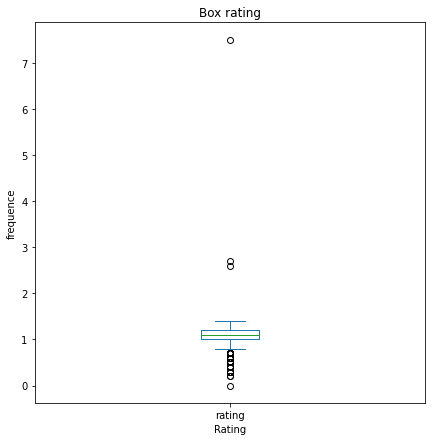

In [199]:
#Boxplot de la répartion des notes
twitter_archive_master['rating'].plot(kind='box',figsize=(7,7))
plt.title('Box rating')
plt.xlabel('Rating')
plt.ylabel('frequence')

On remarque ici que 25% des notes sont comprises entre 0,8 et 1,2,75% des notes sont comprises entre 1,4 et 1,8 on remarque qu'il y'a des notes abérrantes de 2,8 et 3 et en dessous de 0,8

Text(0, 0.5, 'frequence')

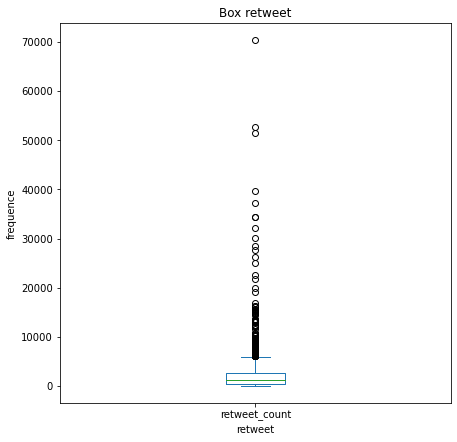

In [200]:
#Boxplot de la répartition des retweets
twitter_archive_master['retweet_count'].plot(kind='box',figsize=(7,7))
plt.title('Box retweet')
plt.xlabel('retweet')
plt.ylabel('frequence')

On constate qu'il y' a beaucoup de valeurs abérrantes pour les echantillons de retweet mais en moyenne nous avons 3 retweets.

Text(0, 0.5, 'frequence')

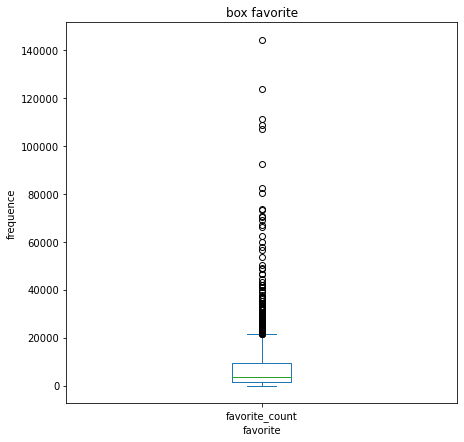

In [201]:
#Boxplot de la répartition des favoris
twitter_archive_master['favorite_count'].plot(kind='box',figsize=(7,7))
plt.title('box favorite')
plt.xlabel('favorite')
plt.ylabel('frequence')

En moyenne nous remarquons que les internautes like les photos des chiens trois fois.Pour certains chiens ces notes peuvent aller jusqu'a plus de 140000 fois

Text(0, 0.5, 'frequence')

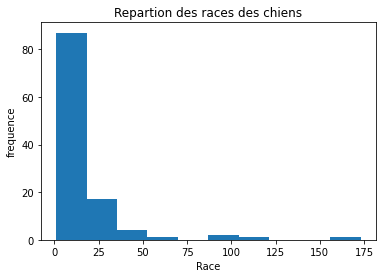

In [202]:
#Répartition des races des chiens en fonction des chiens
twitter_archive_master['prediction_breed_dog'].value_counts().plot(kind='hist')
plt.title('Repartion des races des chiens')
plt.xlabel('Race')
plt.ylabel('frequence')

Il ressort de cette observation que les races de chiens les plus réprésentées **golden retriever,Labrador retriever,Pembroke,Chihuahua,pug** sont-ils alors pour autant les mieux notés?

<AxesSubplot:title={'center':'relation retweet-rating'}, xlabel='retweet_count', ylabel='rating'>

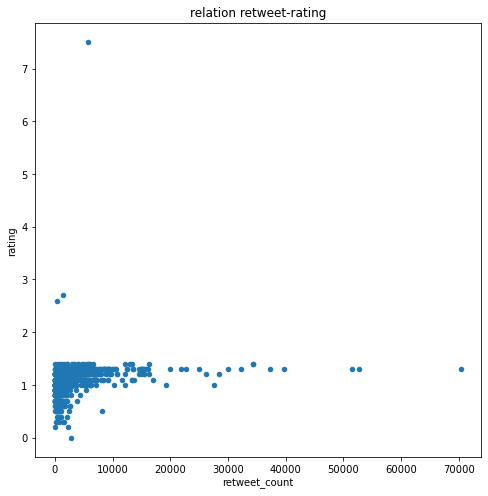

In [203]:
#Nuage de répartion des races des chiens les plus retweetes
twitter_archive_master.plot(x='retweet_count',y='rating',kind='scatter',title='relation retweet-rating' ,figsize=(8,8))

On remarque qu'il n'existe pas une corrélation linéaire entre le nombre de like et de retweet c'est pas forcément parcequ'ils

aiment une photo qu'il le retweet.par contre elle devient constante à partir d'un certain nombre de retweet pres de 5000.

on en déduit que plus les photos sont retweetes plus ils ont la meme note

<AxesSubplot:title={'center':'relation favoris-note'}, xlabel='favorite_count', ylabel='rating'>

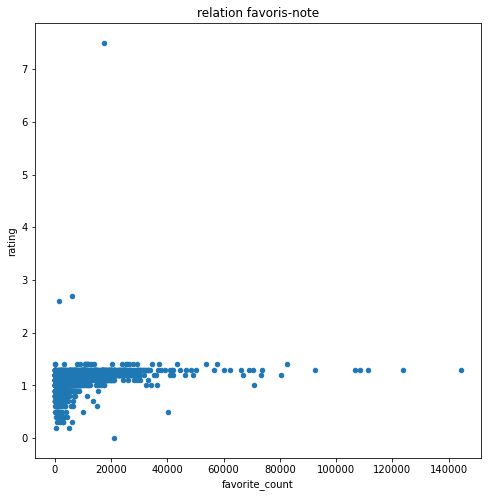

In [204]:
#Nuage de répartion des races des chiens les plus aimés
twitter_archive_master.plot(x='favorite_count',y='rating',kind='scatter',title='relation favoris-note',figsize=(8,8))

On remarque qu'il n'existe pas une corrélation linéaire entre le nombre de like et la note c'est pas forcément parcequ'ils aiment une photo qu'il le retweet.

par contre  on remarque que plus plus les likes sont éléves plus les internautes les notes bien et cela devient constant a partir  de 1500 likes
 

<AxesSubplot:title={'center':'relation favoris-retweet'}, xlabel='favorite_count', ylabel='retweet_count'>

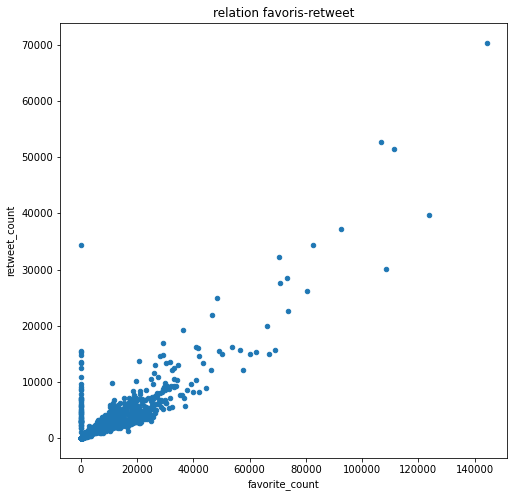

In [205]:
#Relation retweet et nombre de favoris
twitter_archive_master.plot(x='favorite_count',y='retweet_count',kind='scatter',title='relation favoris-retweet',figsize=(8,8))

La relation entre une correlation positive entre les nombres de likes et de retweet.le nombre de retweet augmente avec

le nombre de likes.

## Conclusion

En definitive l'etude de **WeRatedog** nous aura permis d'etudier les préference des chiens des internautes.Ainsi nous avons pu analyser au cours 

de notre etude les relations entre les chiens et les notes qui leurs ont été attribuées.Cela est passé dans un premier temps par

la collecte,l'evaluation,et les nettoyage des données qui apres nous a permis d'effectuer les visualisations necessaires a l'analyse

de nos données.

## Limites

La principale limite dans notre étude aura été les informations indisponibles au niveau de l'API tweeter qui ne nous ont pas permis

de recolter toutes les informations relatives à notre étude.Les tweets ayant été supprimés par les internautes.Nous avons aussi fait

face a un tres grand nombre d'informations inexistantes.

## Bibliographie

http://www.python-simple.com/python-matplotlib/configuration-axes.php

https://www.cours-gratuit.com/tutoriel-python/tutoriel-python-comment-raliser-des-scatter-plot-avec-python
    
https://fr.acervolima.com/